# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [47]:
from mango.tuner import Tuner
from scipy.stats import uniform
import math

def get_param_dict():
    param_dict = {
        'a': uniform(-2, 4),
        'b': uniform(-2, 4)
    }
    return param_dict

def get_objective(x,y):
        x2 = math.pow(x,2)
        x4 = math.pow(x,4)
        y2 = math.pow(y,2)
        return ((4.0 - 2.1 * x2 + (x4 / 3.0)) * x2 + x*y + (-4.0 + 4.0 * y2) * y2)


    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        
        result = -1.0*get_objective(a,b)
        results.append(result)
    return results

def get_conf():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 100
    conf['domain_size'] = 5000
    return conf

def get_optimal_x():
    param_dict = get_param_dict()
    conf = get_conf()
    tuner = Tuner(param_dict, objfunc,conf)
    results = tuner.maximize()
    return results

In [48]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [49]:
for i in range(num_of_tries):
    results = get_optimal_x()
    Store_Results.append(results)
    print(i,":",results['best_objective'])

0 : 0.9359078334959637
1 : 0.9676296278515983
2 : 0.6876810959158091
3 : 0.9654837839294969
4 : 0.9269234437815664
5 : 0.9898861388895176
6 : 0.9760066751741612
7 : 1.0056128385366785
8 : 0.8374288649360303
9 : 0.975724015768233
10 : 1.029751266654881
11 : 0.9543508823219808
12 : 0.9713451132579383
13 : 0.8242120218699863
14 : 0.8330549669976968
15 : 0.8144338528252666
16 : 0.7842010673095927
17 : 1.0069009358507033
18 : 0.9258532203201383
19 : 0.8711654311806847


In [13]:
#results['best_objective']

In [88]:
#len(Store_Results[0]['objective_values'])

In [89]:
#Store_Results[0]['objective_values'][:15]

In [90]:
#len(Store_Results[0]['params_tried'])

# Extract from the results returned the true optimal values for each iteration

In [56]:
import numpy as np

total_experiments = 20

initial_random = 5

plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [57]:
plotting_array = np.array(plotting_list)

In [58]:
plotting_array.shape

(20, 10)

In [59]:
#plotting_array

In [60]:
Y = []
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [61]:
Y

[0.32929475172058553,
 0.540795722822591,
 0.6438876373806363,
 0.7544160031201501,
 0.7821982419246343,
 0.8179952347980965,
 0.8537401984891557,
 0.8843359869101644,
 0.9050414633436121,
 0.9141776538433961]

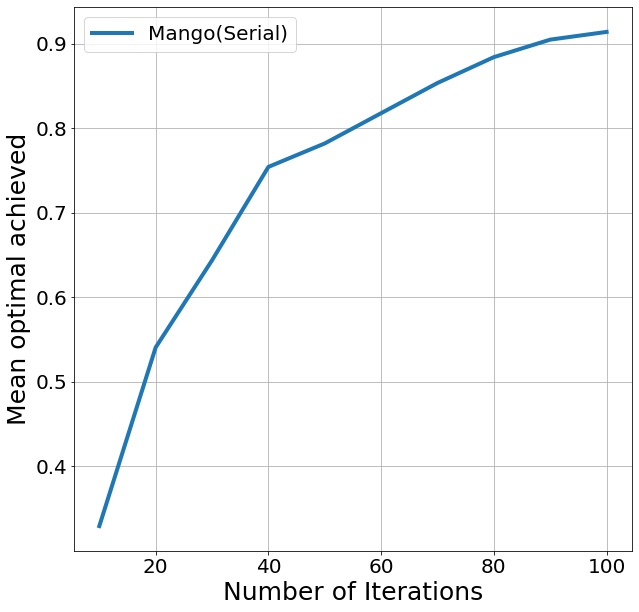

In [62]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'Mango(Serial)',linewidth=4.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean optimal achieved',fontsize=25)
#plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yticks(np.arange(10, 110, step=10))
#plt.xticks(np.arange(10, 110, step=10))
plt.grid(True)
plt.legend(fontsize=20)
plt.show()